In [1]:
#from ipywidgets import interact, widgets
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import anuga
domain = anuga.Domain('warragamba_from_regions_10000.tsh')

In [3]:
ids = domain.tag_boundary_cells['Outflow']

In [4]:
domain.triangles.shape

(16872, 3)

In [5]:
domain.nodes.shape

(10508, 2)

In [6]:
ids = domain.tag_boundary_cells['Outflow']

for i in ids:
    vol_id = domain.boundary_cells[i]
    edge_id = domain.boundary_edges[i]
    #print(vol_id, edge_id)

    #print(domain3.vertex_coordinates.shape)
    vertex_id_0 = domain.triangles[vol_id][edge_id]
    vertex_id_1 = domain.triangles[vol_id][(edge_id+1) % 3]
    vertex_id_2 = domain.triangles[vol_id][(edge_id+2) % 3]

    #print(vol_id, edge_id, vertex_id_1, vertex_id_2)

In [7]:
segments = []
for i, (vol_id, edge_id) in enumerate(zip(domain.boundary_cells, domain.boundary_edges)):
    vertex_id_0 = domain.triangles[vol_id][edge_id]
    vertex_id_1 = domain.triangles[vol_id][(edge_id+1) % 3]
    vertex_id_2 = domain.triangles[vol_id][(edge_id+2) % 3]
    segments.append([vertex_id_1, vertex_id_2, i])

    


In [8]:
segment = segments[0]

new_segments = []

new_segments.append(segment)

print(segment)
while True:
    for next_segment in segments:
        if next_segment[0] == segment[1]:
            #print (next_segment)
            break
    segment = next_segment 
    new_segments.append(segment)
    if segment == new_segments[0]:
        break
            
        
        

[3728, 7, 0]


[4143, 2]
(4143, 2)
(16,)


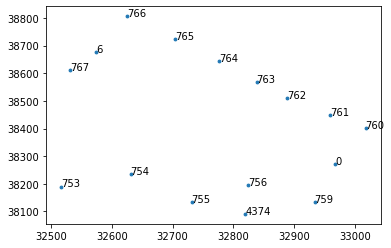

In [12]:
import numpy 
new_segments = numpy.array(new_segments)

ids = new_segments[:,0]
X = domain.nodes[ids,0]
Y = domain.nodes[ids,1]

poly_shape = [X.shape[0], 2]

print(poly_shape)

boundary_poly = numpy.empty(poly_shape)

print(boundary_poly.shape)

boundary_poly[:,0] = X
boundary_poly[:,1] = Y



#icond = numpy.logical_and(X>277000,Y>624700)
icond = numpy.logical_and(X>32500,Y>38000)

ids = ids[icond]
X = X[icond]
Y = Y[icond]

print(X.shape)
plt.clf()
plt.scatter(X, Y, s=8)
#plt.scatter(gx,gy, s=8, c='red')
for i, (x,y) in enumerate(zip(X,Y)):
    plt.annotate(str(ids[i]), (x,y))
plt.show()

In [13]:
# This is probably wrong as it relates to a different tsh file
riverwall_poly = []
nd = domain.nodes
dam_stage = 116
for ids in range(1791, 1784, -1):
    riverwall_poly.append([nd[ids,0], nd[ids,1], dam_stage])
    print(ids)
    
print(riverwall_poly)

1791
1790
1789
1788
1787
1786
1785
[[7617.55671717503, 40965.21358544193, 116], [7693.278297934477, 40946.76068761386, 116], [7754.3452884017315, 40929.89398766495, 116], [7801.680561890447, 40959.96098443773, 116], [7834.192549973959, 40930.81744300295, 116], [7898.260524319892, 40946.32453042548, 116], [7924.378340330615, 41021.71962753218, 116]]


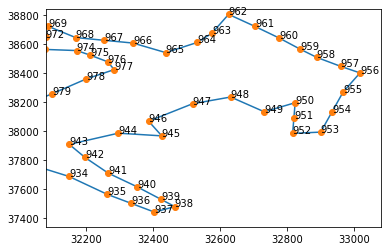

In [15]:
xllcorner = domain.geo_reference.xllcorner
yllcorner = domain.geo_reference.yllcorner

plt.clf()
#plt.scatter(boundary_poly[:,0], boundary_poly[:,1], s=1)
plt.plot(boundary_poly[:,0], boundary_poly[:,1])
plt.plot(boundary_poly[:,0], boundary_poly[:,1], 'o')
#plt.scatter(gx,gy, s=8, c='red')
for i, (x,y) in enumerate(zip(boundary_poly[:,0],boundary_poly[:,1])):
    plt.annotate(str(i), (x,y))
plt.xlim(277000-xllcorner,278000-xllcorner)
plt.ylim(6247000-yllcorner,6248500-yllcorner)
plt.show()

In [ ]:
riverwall_poly = []
nd = boundary_poly
dam_stage = 116
for ids in range(753, 760):
    riverwall_poly.append([nd[ids,0], nd[ids,1], dam_stage])
    print(ids)
    
print(riverwall_poly)

In [ ]:
new_boundary_poly   = numpy.insert(boundary_poly, 754, boundary_poly[753] + numpy.array([50.0,130.0]), 0)
new_boundary_poly_1 = numpy.insert(new_boundary_poly, 760, new_boundary_poly[760] + numpy.array([50.0,130.0]), 0)

new_boundary_poly_1[755:760] = new_boundary_poly_1[755:760] + numpy.array([50.0,130.0])

bp = new_boundary_poly_1
plt.clf()
#plt.scatter(boundary_poly[:,0], boundary_poly[:,1], s=1)
plt.plot(bp[:,0], bp[:,1])
plt.plot(bp[:,0], bp[:,1], 'o')
#plt.scatter(gx,gy, s=8, c='red')
for i, (x,y) in enumerate(zip(bp[:,0],bp[:,1])):
    plt.annotate(str(i), (x,y))
plt.xlim(277000,278000)
plt.ylim(6247000,6248500)
plt.show()


#numpy.savetxt('boundary_poly.csv', new_boundary_poly_1, delimiter=',')

In [ ]:
bound_p = numpy.loadtxt('boundary_poly.csv', delimiter=',')

In [ ]:
bp = bound_p
plt.clf()
#plt.scatter(boundary_poly[:,0], boundary_poly[:,1], s=1)
plt.plot(bp[:,0], bp[:,1])
plt.plot(bp[:,0], bp[:,1], 'o')

rw = dam_wall
plt.plot(rw[:,0], rw[:,1])
plt.plot(rw[:,0], rw[:,1], 'go')

#plt.scatter(gx,gy, s=8, c='red')
for i, (x,y) in enumerate(zip(bp[:,0],bp[:,1])):
    plt.annotate(str(i), (x,y))
plt.xlim(277000,278000)
plt.ylim(6247000,6248500)
plt.show()


In [ ]:
#numpy.savetxt('dam_wall.csv', riverwall_poly, delimiter=',')

In [ ]:
#dam_wall = numpy.loadtxt('dam_wall.csv', delimiter=',')